### INTRODUCTION:

In [138]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

### Variables in the Dataset

CustomerID         : A unique ID that identifies each customer.

Count              : A value used in reporting/dashboarding to sum up the number of customers in a filtered set.

Country            : The country of the customer’s primary residence.

State              : The state of the customer’s primary residence.

City               : The city of the customer’s primary residence.

Zip Code           : The zip code of the customer’s primary residence.

Lat Long           : The combined latitude and longitude of the customer’s primary residence.

Latitude           : The latitude of the customer’s primary residence.

Longitude          : The longitude of the customer’s primary residence.

Gender             : The customer’s gender: Male, Female

Senior Citizen     : Indicates if the customer is 65 or older: Yes, No

Partner            : Indicate if the customer has a partner: Yes, No

Dependents         : Indicates if the customer lives with any dependents: Yes, No. 
                     Dependents could be children, parents, grandparents, etc.
                     
Tenure Months      : Indicates the total amount of months that the customer has been with the company by the end of the quarter specified above.

Phone Service      : Indicates if the customer subscribes to home phone service with the company: Yes, No

Multiple Lines     :   Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No

Internet Service   : Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.

Online Security    : Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No

Online Backup      : Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No

Device Protection  : Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No

Tech Support       : Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No

Streaming TV       : Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. The company does not charge an additional fee for this service.

Streaming Movies   : Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service.

Contract           : Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.

Paperless Billing  : Indicates if the customer has chosen paperless billing: Yes, No

Payment Method     : Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check

Monthly Charge     : Indicates the customer’s current total monthly charge for all their services from the company.

Total Charges      : Indicates the customer’s total charges, calculated to the end of the quarter specified above.

Churn Label        : Yes = the customer left the company this quarter. No = the customer remained with the company. Directly related to Churn Value.

Churn Value        : 1 = the customer left the company this quarter. 0 = the customer remained with the company. Directly related to Churn Label.

Churn Score        : A value from 0-100 that is calculated using the predictive tool IBM SPSS Modeler. The model incorporates multiple factors known to cause churn. The higher the score, the more likely the customer will churn.

CLTV               : Customer Lifetime Value. A predicted CLTV is calculated using corporate formulas and existing data. The higher the value, the more valuable the customer. High value customers should be monitored for churn.

Churn Reason       : A customer’s specific reason for leaving the company. Directly related to Churn Category.

In [230]:
teleco_customer_churn=pd.read_excel(r"C:\Users\dsv24\Downloads\Telco_customer_churn.xlsx")# reading the data set with the help of pandas data frame
teleco_customer_churn # data frame name which i have given

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1.0,United States,California,Los Angeles,90003.0,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1.0,86.0,3239.0,Competitor made better offer
1,9237-HQITU,1.0,United States,California,Los Angeles,90005.0,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1.0,67.0,2701.0,Moved
2,9305-CDSKC,1.0,United States,California,Los Angeles,90006.0,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8.0,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1.0,86.0,5372.0,Moved
3,7892-POOKP,1.0,United States,California,Los Angeles,90010.0,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28.0,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1.0,84.0,5003.0,Moved
4,0280-XJGEX,1.0,United States,California,Los Angeles,90015.0,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49.0,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1.0,89.0,5340.0,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1.0,United States,California,Landers,92285.0,"34.341737, -116.539416",34.341737,-116.539416,Female,No,No,No,72.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0.0,45.0,5306.0,NaN
7039,6840-RESVB,1.0,United States,California,Adelanto,92301.0,"34.667815, -117.536183",34.667815,-117.536183,Male,No,Yes,Yes,24.0,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No,0.0,59.0,2140.0,NaN
7040,2234-XADUH,1.0,United States,California,Amboy,92304.0,"34.559882, -115.637164",34.559882,-115.637164,Female,No,Yes,Yes,72.0,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No,0.0,71.0,5560.0,NaN
7041,4801-JZAZL,1.0,United States,California,Angelus Oaks,92305.0,"34.1678, -116.86433",34.167800,-116.864330,Female,No,Yes,Yes,11.0,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,0.0,59.0,2793.0,NaN


In [5]:
teleco_customer_churn.head() # head function gives top five rows

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1.0,United States,California,Los Angeles,90003.0,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1.0,86.0,3239.0,Competitor made better offer
1,9237-HQITU,1.0,United States,California,Los Angeles,90005.0,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1.0,67.0,2701.0,Moved
2,9305-CDSKC,1.0,United States,California,Los Angeles,90006.0,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1.0,86.0,5372.0,Moved
3,7892-POOKP,1.0,United States,California,Los Angeles,90010.0,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1.0,84.0,5003.0,Moved
4,0280-XJGEX,1.0,United States,California,Los Angeles,90015.0,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1.0,89.0,5340.0,Competitor had better devices


In [6]:
pd.set_option('display.max_columns',None) # set_option function is used to display maximum columns.
teleco_customer_churn.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1.0,United States,California,Los Angeles,90003.0,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1.0,86.0,3239.0,Competitor made better offer
1,9237-HQITU,1.0,United States,California,Los Angeles,90005.0,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1.0,67.0,2701.0,Moved
2,9305-CDSKC,1.0,United States,California,Los Angeles,90006.0,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8.0,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1.0,86.0,5372.0,Moved
3,7892-POOKP,1.0,United States,California,Los Angeles,90010.0,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28.0,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1.0,84.0,5003.0,Moved
4,0280-XJGEX,1.0,United States,California,Los Angeles,90015.0,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49.0,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1.0,89.0,5340.0,Competitor had better devices


In [7]:
teleco_customer_churn.tail() # tail function displays bottom  five rows

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
7038,2569-WGERO,1.0,United States,California,Landers,92285.0,"34.341737, -116.539416",34.341737,-116.539416,Female,No,No,No,72.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0.0,45.0,5306.0,NaN
7039,6840-RESVB,1.0,United States,California,Adelanto,92301.0,"34.667815, -117.536183",34.667815,-117.536183,Male,No,Yes,Yes,24.0,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No,0.0,59.0,2140.0,NaN
7040,2234-XADUH,1.0,United States,California,Amboy,92304.0,"34.559882, -115.637164",34.559882,-115.637164,Female,No,Yes,Yes,72.0,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No,0.0,71.0,5560.0,NaN
7041,4801-JZAZL,1.0,United States,California,Angelus Oaks,92305.0,"34.1678, -116.86433",34.167800,-116.864330,Female,No,Yes,Yes,11.0,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,0.0,59.0,2793.0,NaN
7042,3186-AJIEK,1.0,United States,California,Apple Valley,92308.0,"34.424926, -117.184503",34.424926,-117.184503,Male,No,No,No,66.0,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No,0.0,38.0,5097.0,NaN


In [8]:
teleco_customer_churn.info()  # info function gives information about the data frame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   float64
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   float64
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   float64
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [12]:
teleco_customer_churn.describe(include="all") # describe function shows all the statistically measures in the data frame.

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
count,7043,7043.0,7043,7043,7043,7043.000000,7043,7043.000000,7043.000000,7043,7043,7043,7043,7043.000000,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043.0,7043,7043.000000,7043.000000,7043.000000,1869
unique,7043,NaN,1,1,1129,NaN,1652,NaN,NaN,2,2,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,6531.0,2,NaN,NaN,NaN,20
top,3668-QPYBK,NaN,United States,California,Los Angeles,NaN,"33.964131, -118.272783",NaN,NaN,Male,No,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,20.2,No,NaN,NaN,NaN,Attitude of support person
freq,1,NaN,7043,7043,305,NaN,5,NaN,NaN,3555,5901,3641,5416,NaN,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,NaN,11.0,5174,NaN,NaN,NaN,192
mean,NaN,1.0,NaN,NaN,NaN,93521.964646,NaN,36.282441,-119.798880,NaN,NaN,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN,0.265370,58.699418,4400.295755,NaN
std,NaN,0.0,NaN,NaN,NaN,1865.794555,NaN,2.455723,2.157889,NaN,NaN,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN,0.441561,21.525131,1183.057152,NaN
min,NaN,1.0,NaN,NaN,NaN,90001.000000,NaN,32.555828,-124.301372,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN,0.000000,5.000000,2003.000000,NaN
25%,NaN,1.0,NaN,NaN,NaN,92102.000000,NaN,34.030915,-121.815412,NaN,NaN,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN,0.000000,40.000000,3469.000000,NaN
50%,NaN,1.0,NaN,NaN,NaN,93552.000000,NaN,36.391777,-119.730885,NaN,NaN,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN,0.000000,61.000000,4527.000000,NaN
75%,NaN,1.0,NaN,NaN,NaN,95351.000000,NaN,38.224869,-118.043237,NaN,NaN,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN,1.000000,75.000000,5380.500000,NaN


In [14]:
 teleco_customer_churn.isnull().sum() # isnull and sum functions are used to diplay the count of no of null values present in the table.

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

In [15]:
teleco_customer_churn.nunique() # nunique function is used to show the no of unique values present in the data frame.

CustomerID           7043
Count                   1
Country                 1
State                   1
City                 1129
Zip Code             1652
Lat Long             1652
Latitude             1652
Longitude            1651
Gender                  2
Senior Citizen          2
Partner                 2
Dependents              2
Tenure Months          73
Phone Service           2
Multiple Lines          3
Internet Service        3
Online Security         3
Online Backup           3
Device Protection       3
Tech Support            3
Streaming TV            3
Streaming Movies        3
Contract                3
Paperless Billing       2
Payment Method          4
Monthly Charges      1585
Total Charges        6531
Churn Label             2
Churn Value             2
Churn Score            85
CLTV                 3438
Churn Reason           20
dtype: int64

<AxesSubplot:>

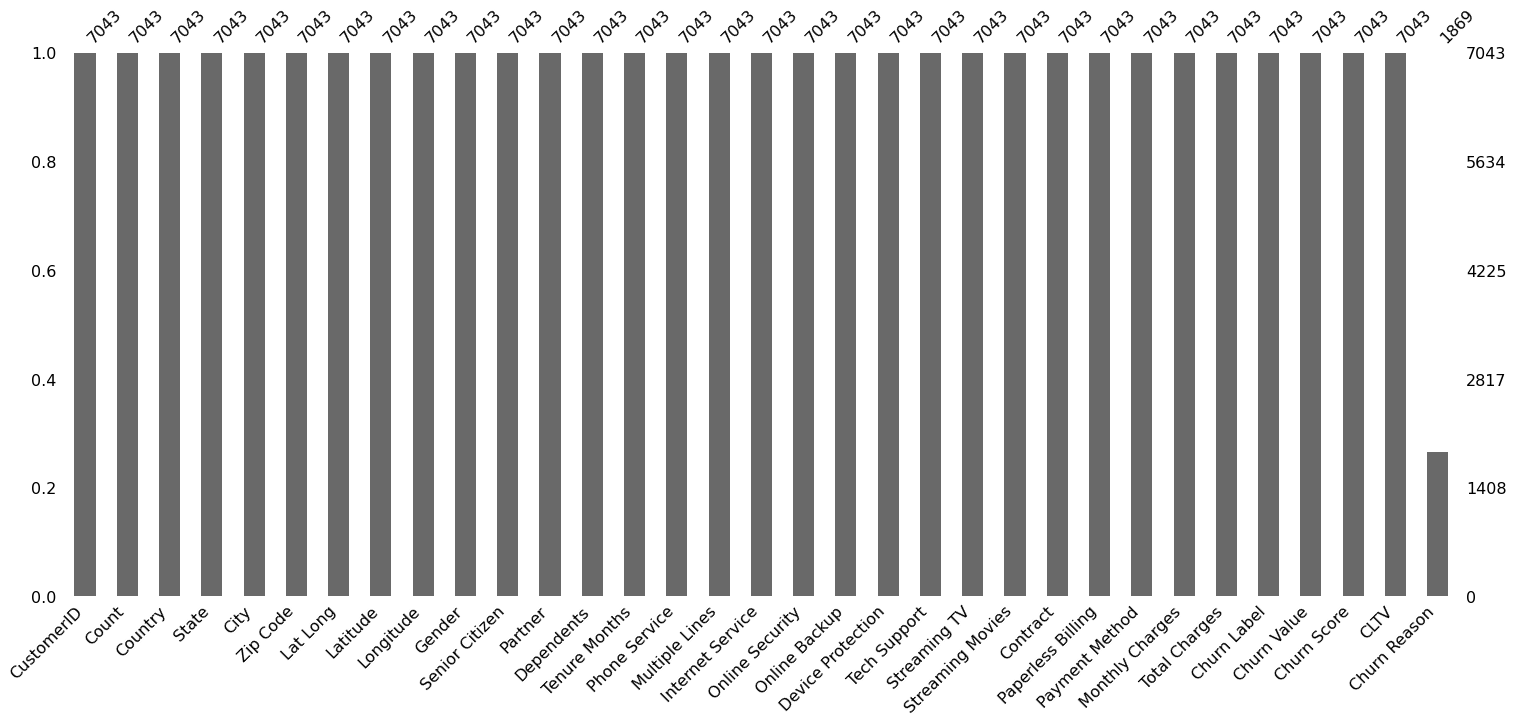

In [139]:
msno.bar(teleco_customer_churn) # Used missingno library to diplay the null values in the form of bar chart.

#### Inference: Null values can be seen in Churn Reason variable.

In [246]:
teleco_customer_churn[teleco_customer_churn.select_dtypes(['object']).columns] = teleco_customer_churn.select_dtypes(['object']).apply(lambda x: x.astype('category'))
# converted all the object data types into category.

In [247]:
teleco_customer_churn.info() # objects are converted into category

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   CustomerID         7043 non-null   category
 1   Count              7043 non-null   float64 
 2   Country            7043 non-null   category
 3   State              7043 non-null   category
 4   City               7043 non-null   category
 5   Zip Code           7043 non-null   category
 6   Lat Long           7043 non-null   category
 7   Latitude           7043 non-null   float64 
 8   Longitude          7043 non-null   float64 
 9   Gender             7043 non-null   category
 10  Senior Citizen     7043 non-null   category
 11  Partner            7043 non-null   category
 12  Dependents         7043 non-null   category
 13  Tenure Months      7043 non-null   float64 
 14  Phone Service      7043 non-null   category
 15  Multiple Lines     7043 non-null   category
 16  Intern

In [58]:
# i wrote a python program to see the percentages of males and females in the data set rather than using built in function.
for i in teleco_customer_churn['Gender']:
    if i=='Female':
        females+=1
    else:
        males+=1
total=males+females
percentage_of_females=(females/total)*100
percentage_of_males=(males/total)*100
print('The percentage of female customers:',round(percentage_of_females,2))
print('The percentage of male customers:',round(percentage_of_males,2))

The percentage of female customers: 49.52
The percentage of male customers: 50.48


In [248]:
teleco_customer_churn['Zip Code']=teleco_customer_churn['Zip Code'].astype('category') # converted Zip Code data type

In [249]:
teleco_customer_churn.dtypes

CustomerID           category
Count                 float64
Country              category
State                category
City                 category
Zip Code             category
Lat Long             category
Latitude              float64
Longitude             float64
Gender               category
Senior Citizen       category
Partner              category
Dependents           category
Tenure Months         float64
Phone Service        category
Multiple Lines       category
Internet Service     category
Online Security      category
Online Backup        category
Device Protection    category
Tech Support         category
Streaming TV         category
Streaming Movies     category
Contract             category
Paperless Billing    category
Payment Method       category
Monthly Charges       float64
Total Charges        category
Churn Label          category
Churn Value           float64
Churn Score           float64
CLTV                  float64
Churn Reason         category
dtype: obj

#### Q1: Please read the file and explain data types statistically as well as how python is reading it. Please let us know if any data type is read wrong.

In [ ]:
All the 33 columns are mentioned below statistically.
CustomerID           category
Count                discrete
Country              category
State                category
City                 category
Zip Code             category
Lat Long             category
Latitude             continuous
Longitude            continuous
Gender               category
Senior Citizen       category
Partner              category
Dependents           category
Tenure Months        discrete
Phone Service        category
Multiple Lines       category
Internet Service     category
Online Security      category
Online Backup        category
Device Protection    category
Tech Support         category
Streaming TV         category
Streaming Movies     category
Contract             category
Paperless Billing    category
Payment Method       category
Monthly Charges      continuous
Total Charges        continuous
Churn Label          category
Churn Value          continuous
Churn Score          continuous
CLTV                 continuous
Churn Reason         category

#### Inference: I have displayed the statistical measures of the columns present in the dataset.Python read few fields wrong such as "Zipcode" which seem to numerical but in actual it is not, it is used to categorize the places. "Total Charges" was also read wrong as categorical but in actual it is numerical data which is continuous.And few of the variables like "Count , Tenure Months, Churn Value, Churn Score, CLTV" are read as float which are integers.

In [250]:
teleco_customer_churn['Count']=teleco_customer_churn['Count'].astype('int64') # converted the datatypes of "count"
teleco_customer_churn['Count'].dtype

dtype('int64')

In [251]:
teleco_customer_churn['Tenure Months']=teleco_customer_churn['Tenure Months'].astype('int64') # converted the data types of "Tenure Months"
teleco_customer_churn['Tenure Months'].dtype

dtype('int64')

In [252]:
teleco_customer_churn['Total Charges']=pd.to_numeric(teleco_customer_churn['Total Charges'],errors='coerce')
# converted the data type of Total Charges

In [253]:
teleco_customer_churn['Total Charges'].dtypes

dtype('float64')

In [254]:
teleco_customer_churn[['Churn Value','Churn Score','CLTV']]=teleco_customer_churn[['Churn Value','Churn Score','CLTV']].astype('int64')
teleco_customer_churn[['Churn Value','Churn Score','CLTV']].dtypes  # converted the datatype of the above variables.

Churn Value    int64
Churn Score    int64
CLTV           int64
dtype: object

<AxesSubplot:>

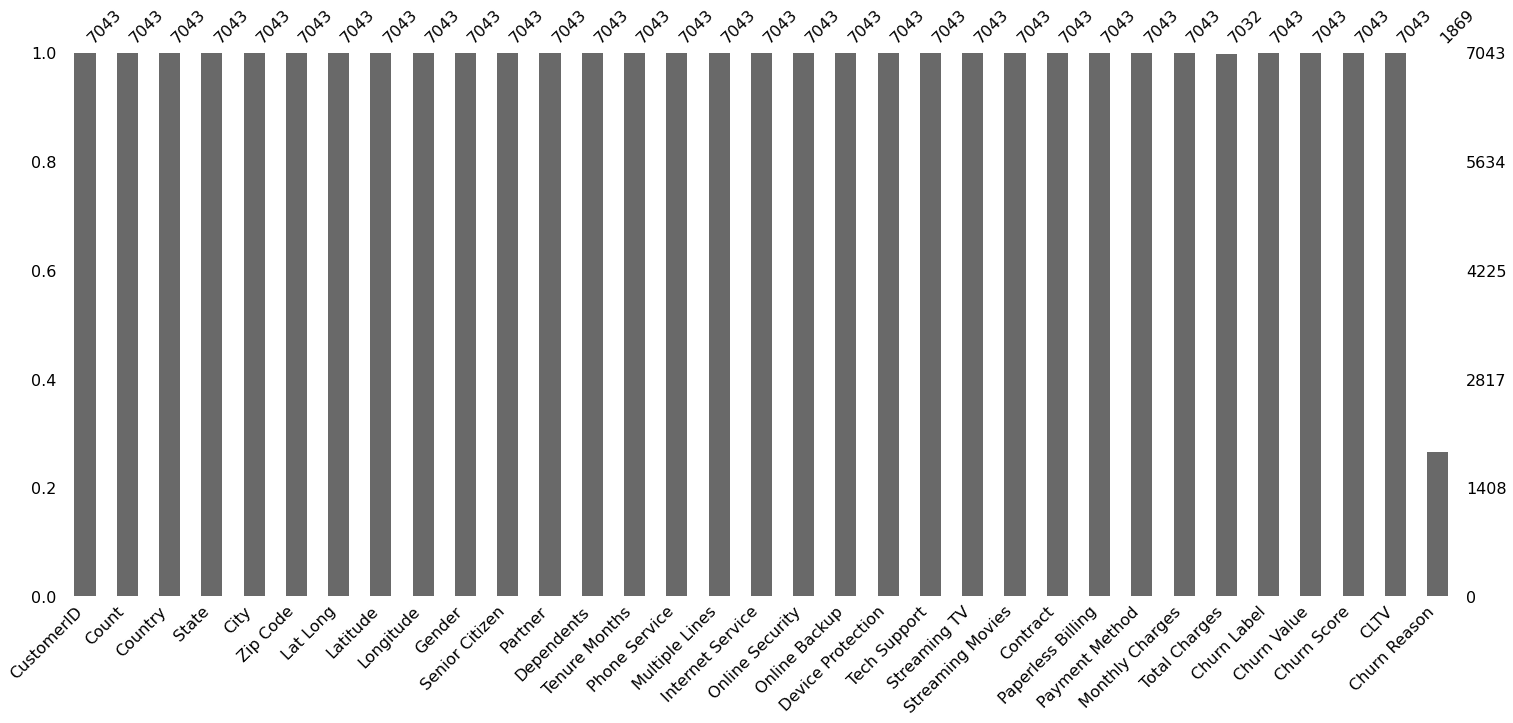

In [172]:
msno.bar(teleco_customer_churn)

#### Inference: From the above bar plot null values can be seen in "Total Charges" and "Churn Reason" variables.

In [82]:
teleco_customer_churn.head(10)

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003.0,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005.0,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006.0,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010.0,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015.0,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices
5,4190-MFLUW,1,United States,California,Los Angeles,90020.0,"34.066367, -118.309868",34.066367,-118.309868,Female,No,Yes,No,10,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Credit card (automatic),55.20,528.35,Yes,1,78,5925,Competitor offered higher download speeds
6,8779-QRDMV,1,United States,California,Los Angeles,90022.0,"34.02381, -118.156582",34.023810,-118.156582,Male,Yes,No,No,1,No,No phone service,DSL,No,No,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes,1,100,5433,Competitor offered more data
7,1066-JKSGK,1,United States,California,Los Angeles,90024.0,"34.066303, -118.435479",34.066303,-118.435479,Male,No,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,Yes,1,92,4832,Competitor made better offer
8,6467-CHFZW,1,United States,California,Los Angeles,90028.0,"34.099869, -118.326843",34.099869,-118.326843,Male,No,Yes,Yes,47,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.35,4749.15,Yes,1,77,5789,Competitor had better devices
9,8665-UTDHZ,1,United States,California,Los Angeles,90029.0,"34.089953, -118.294824",34.089953,-118.294824,Male,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,No,Electronic check,30.20,30.2,Yes,1,97,2915,Competitor had better devices


In [159]:
teleco_customer_churn.info() # finall i changed all the data types properly as python read few wrong.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   CustomerID         7043 non-null   category
 1   Count              7043 non-null   int64   
 2   Country            7043 non-null   category
 3   State              7043 non-null   category
 4   City               7043 non-null   category
 5   Zip Code           7043 non-null   category
 6   Lat Long           7043 non-null   category
 7   Latitude           7043 non-null   float64 
 8   Longitude          7043 non-null   float64 
 9   Gender             7043 non-null   category
 10  Senior Citizen     7043 non-null   category
 11  Partner            7043 non-null   category
 12  Dependents         7043 non-null   category
 13  Tenure Months      7043 non-null   int64   
 14  Phone Service      7043 non-null   category
 15  Multiple Lines     7043 non-null   category
 16  Intern

#### Q2: Please apply appropriate statistical measures using python based on data types.

In [87]:
teleco_customer_churn.describe()

,Count,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000


#### Inference: I am not able to see Total Charges.

####  Q3: What is the percentage of females and senior citizens in this data set? Please create appropriate plots and explain the plots.

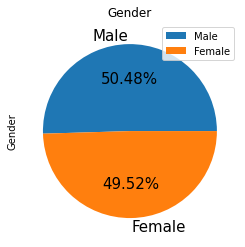

In [141]:
teleco_customer_churn['Gender'].value_counts().plot(kind="pie",fontsize=15,autopct="%1.2f%%",shadow=False)# used pie plot to show the % percentage of male and female.
plt.legend()
plt.title('Gender')
plt.show()


#### Inference: From the above plot we can see the % of Male and Female in the data set.

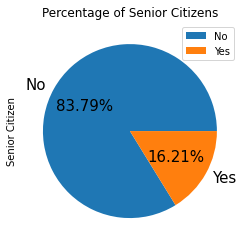

In [140]:
teleco_customer_churn['Senior Citizen'].value_counts().plot(kind="pie",fontsize=15,autopct="%1.2f%%",shadow=False)# used pie chart to see the percentage of senior citizens.
plt.legend()
plt.title('Percentage of Senior Citizens')
plt.show()


#### Inference: From the above plot we can see the percentage of Senior Citizens

In [97]:
teleco_customer_churn[['Senior Citizen','Gender']].value_counts(normalize=True)*100

Senior Citizen  Gender
No              Male      42.325713
                Female    41.459605
Yes             Male       8.149936
                Female     8.064745
dtype: float64

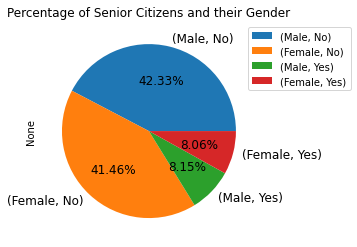

In [136]:
teleco_customer_churn[['Gender','Senior Citizen']].value_counts().plot(kind="pie",fontsize=12,autopct="%1.2f%%",shadow=False)
plt.legend(bbox_to_anchor=(1.45, 1),loc='upper right')
plt.title('Percentage of Senior Citizens and their Gender')
plt.show()

#### Inference: From the above plot we can see the % of female who are Senior citizens .yes represents senior Citizen and no represents not senior citizen.

#### Q4:  Please create an appropriate plot to examine the distribution of the tenure month column and explain the distribution. Based on distribution, perform appropriate statistical measures. Please also explain if the variable is symmetric or skewed. Please calculate it. Explain everything as asked.

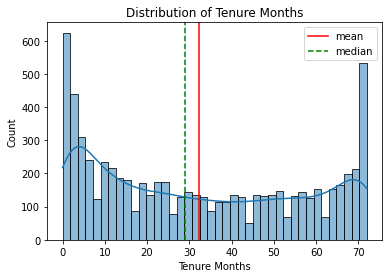

In [134]:
sns.histplot(x='Tenure Months',data=teleco_customer_churn,kde=True,bins=40).set(title='Distribution of Tenure Months') # used histogram from seaborn library to see the distribution of data.
plt.axvline(x=teleco_customer_churn['Tenure Months'].mean(),color='r',label='mean')  # with the matplotlib.pyplot library using vertical axis line to represent mean
plt.axvline(x=teleco_customer_churn['Tenure Months'].median(),color='g',label='median',ls='--')# with the matplotlib.pyplot library using vertical axis line to represent median
plt.legend()  # Places a legend on the Axes

#### Inference:From the above plot we can say the curve looks like bimodal.It is hard to interpret from the graph.Here mean is slightly higher than median.But this is not a major difference.I would like to look at the skewness value and comment about it .

In [115]:
teleco_customer_churn['Tenure Months'].skew() # the skewness value is 0.29 which is in the range of symmetric.

0.2395397495619829

In [135]:
teleco_customer_churn['Tenure Months'].describe() # describe function shows the statistical measures of this column

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: Tenure Months, dtype: float64

#### Q5: Please convert all binary columns into 0 and 1 using appropriate programming constructs, not one by one.

In [209]:
teleco_customer_churn.nunique() # nunique function displays the no of unique values.

CustomerID           7043
Count                   1
Country                 1
State                   1
City                 1129
Zip Code             1652
Lat Long             1652
Latitude             1652
Longitude            1651
Gender                  2
Senior Citizen          2
Partner                 2
Dependents              2
Tenure Months          73
Phone Service           2
Multiple Lines          3
Internet Service        3
Online Security         3
Online Backup           3
Device Protection       3
Tech Support            3
Streaming TV            3
Streaming Movies        3
Contract                3
Paperless Billing       2
Payment Method          4
Monthly Charges      1585
Total Charges        6530
Churn Label             2
Churn Value             2
Churn Score            85
CLTV                 3438
Churn Reason           20
dtype: int64

In [256]:
catgories=teleco_customer_churn.select_dtypes(include='category') # categories contains all the variables with category datatype
catgories.head()

,CustomerID,Country,State,City,Zip Code,Lat Long,Gender,Senior Citizen,Partner,Dependents,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Churn Label,Churn Reason
0,3668-QPYBK,United States,California,Los Angeles,90003.0,"33.964131, -118.272783",Male,No,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes,Competitor made better offer
1,9237-HQITU,United States,California,Los Angeles,90005.0,"34.059281, -118.30742",Female,No,No,Yes,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes,Moved
2,9305-CDSKC,United States,California,Los Angeles,90006.0,"34.048013, -118.293953",Female,No,No,Yes,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,Yes,Moved
3,7892-POOKP,United States,California,Los Angeles,90010.0,"34.062125, -118.315709",Female,No,Yes,Yes,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,Yes,Moved
4,0280-XJGEX,United States,California,Los Angeles,90015.0,"34.039224, -118.266293",Male,No,No,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),Yes,Competitor had better devices


In [217]:
catgories.columns

Index(['CustomerID', 'Country', 'State', 'City', 'Zip Code', 'Lat Long',
       'Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Churn Label', 'Churn Reason'],
      dtype='object')

In [220]:
catgories.columns # displays all the categorical columns

Index(['CustomerID', 'Country', 'State', 'City', 'Zip Code', 'Lat Long',
       'Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Churn Label', 'Churn Reason'],
      dtype='object')

In [257]:
Categorical_data=pd.DataFrame()   # created an empty data frame 
for i in catgories.columns:        # iterating through categorical columns
    if catgories[i].nunique()==2:   # i am converting categorical to binary where there are only two unique values
        if i!="Gender":      
            density_map = {'Yes' : 1,'No' : 0}  # mapping all "Yes" values to 1 and "No" to 0.
            Categorical_data[i] = teleco_customer_churn[i].map(density_map) # finally data is stored in new data frame.
        elif i=="Gender":
            density_map ={'Male':1, 'Female':0}  # mapping all 'Male' to 1 and "Females" to 0.
            Categorical_data[i]=teleco_customer_churn[i].map(density_map)
        

Categorical_data.head() # finally displaying the data frame tha stored all the binary values.

,Gender,Senior Citizen,Partner,Dependents,Phone Service,Paperless Billing,Churn Label
0,1,0,0,0,1,1,1
1,0,0,0,1,1,1,1
2,0,0,0,1,1,1,1
3,0,0,1,1,1,1,1
4,1,0,0,1,1,1,1


#### Q6: Please examine the distribution of monthly charges between males and females using box plots. Please explain the results also. 

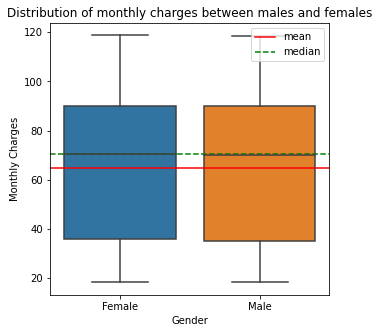

In [133]:
plt.figure(figsize=(5,5))
sns.boxplot(x='Gender',y='Monthly Charges',data=teleco_customer_churn).set(title='Distribution of monthly charges between males and females') # used barplot to see the distribution of jobs with age
plt.axhline(y=teleco_customer_churn['Monthly Charges'].mean(),color='r',label='mean')  # with the matplotlib.pyplot library using vertical axis line to represent mean
plt.axhline(y=teleco_customer_churn['Monthly Charges'].median(),color='g',label='median',ls='--')# with the matplotlib.pyplot library using vertical axis line to represent median
plt.legend(loc='upper right')  # Places a legend on the Axes

#### Inference: From the above Box Plot "Monthly Charges"  for both male and female look similar.

#### Q7: Please find what is the minimum total charges for Los Angeles city. Please find which zip code has the maximum total charges.

In [173]:
teleco_customer_churn['Total Charges'].min()

18.8

In [179]:
teleco_customer_churn.groupby('City')['Total Charges'].min().sort_values()

City
Los Angeles      18.80
Arnold           18.85
Twain            18.85
Sierraville      18.90
Anaheim          19.00
                ...   
Tupman         4149.45
Kelseyville    4159.45
South Gate     4162.05
Gualala        4299.75
Alamo          4919.70
Name: Total Charges, Length: 1129, dtype: float64

#### Inference: The minimum total charges for Los Angeles city is 18.80.

In [195]:
teleco_customer_churn.groupby('Zip Code')['Total Charges'].max().sort_values(ascending=False)

Zip Code
95519.0    8684.80
95461.0    8672.45
90822.0    8670.10
92230.0    8594.40
92614.0    8564.75
            ...   
92305.0     346.45
96161.0     305.55
95551.0     279.30
94520.0     256.60
96110.0      81.70
Name: Total Charges, Length: 1652, dtype: float64

#### Inference: "95519" is the Zip Code which has the maximun no of total charges.

#### Q8: Please find which payment method has the highest churn score and which has the lowest churn score.

In [232]:
teleco_customer_churn.groupby('Payment Method')['Churn Score'].max()

Payment Method
Bank transfer (automatic)    100.0
Credit card (automatic)      100.0
Electronic check             100.0
Mailed check                 100.0
Name: Churn Score, dtype: float64

#### Inferenc:All the four payment methods have highest churn score value which is 100.

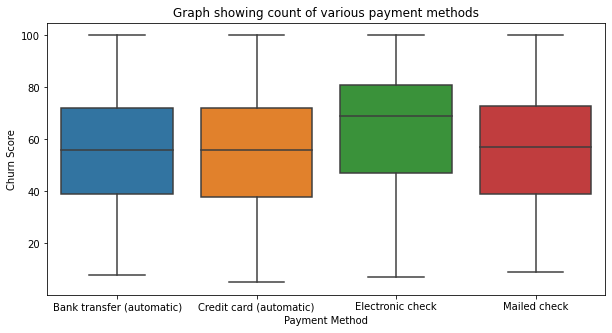

In [168]:
plt.figure(figsize=(10,5)) # setting figure size
sns.boxplot(x='Payment Method',y='Churn Score',data=teleco_customer_churn).set(title='Graph showing count of various payment methods')
plt.show()

#### Inference: From the above plot we can say that Churn score values are higher in "Electronic Check"

In [202]:
teleco_customer_churn.groupby('Payment Method')['Churn Score'].min().sort_values()

Payment Method
Credit card (automatic)      5
Electronic check             7
Bank transfer (automatic)    8
Mailed check                 9
Name: Churn Score, dtype: int64

#### Inference:From the above groupby function we can say that Credit card (automatic) has the lowest churn Score.

#### Q9: Please create an appropriate plot to check the count of payment methods and explain it.

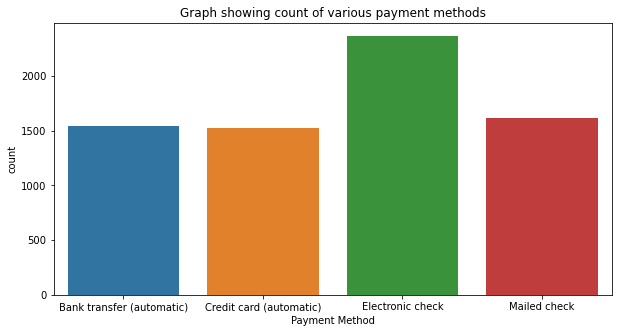

In [166]:
plt.figure(figsize=(10,5))
sns.countplot(x='Payment Method',data=teleco_customer_churn).set(title='Graph showing count of various payment methods')
plt.show() # used countplot see the bias present in the dataset.

#### Inference: In the above count plot, we can see the count of various payment methods. From the we can say that Electronic check payments are used more by the customers.

#### Q10: Please create an appropriate plot to see the relationship between monthly charges and total charges.

<AxesSubplot:xlabel='Total Charges', ylabel='Monthly Charges'>

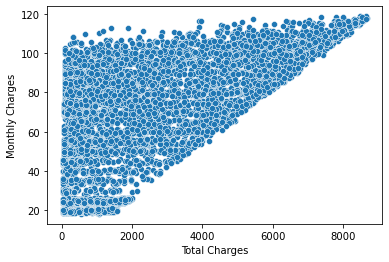

In [207]:
sns.scatterplot(x='Total Charges',y='Monthly Charges',data=teleco_customer_churn)

#### Inference:From the above plot we can see that as the Monthly charges increases the total charges also gets increased.There is linear increase between the variables.